In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.visualization.scatter import Scatter

from net_flow_opt.utils import components, structure, activities_duration
from net_flow_opt.system import System
from net_flow_opt.scheduler import  Plan, Activity
from net_flow_opt.discrete_model import DiscreteModel


Main parameters of the experiment are declared here.

In [2]:
pop_size = 150
termination = ('n_gen', 200)
seed = 1124

The cells below repeat the experiment with a different number of resources.

In [3]:
resources = 3

system = System(structure, resources, components)

dates = [c.x_star for c in components]

original_activities = [
    Activity(component, date, duration)
    for component, date, duration in zip(system.components, dates, activities_duration)
]

original_plan = Plan(
    system=system,
    activities=original_activities
)

problem = DiscreteModel(
    system=system,
    original_plan=original_plan,
    resources=resources,
)

algorithm = NSGA2(
    sampling=IntegerRandomSampling(),
    crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
    mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=RoundingRepair()),
    pop_size=pop_size,
    eliminate_duplicates=True,
)

Run the experiment using the number of iterations to stop the algorithm.

In [4]:
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=termination,
    seed=seed,
    verbose=True,
)

/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      150 |      2 |  0.000000E+00 |  0.0400000000 |             - |             -


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


     2 |      300 |      3 |  0.000000E+00 |  0.000000E+00 |  0.2542608739 |             f
     3 |      450 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1591081556 |         ideal


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


     4 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1454289486 |         ideal
     5 |      750 |     10 |  0.000000E+00 |  0.000000E+00 |  0.0035265545 |         ideal


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


     6 |      900 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0204677473 |             f
     7 |     1050 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0770677946 |         ideal
     8 |     1200 |     13 |  0.000000E+00 |  0.000000E+00 |  0.0436096472 |         ideal
     9 |     1350 |     12 |  0.000000E+00 |  0.000000E+00 |  0.0148206774 |         ideal
    10 |     1500 |     12 |  0.000000E+00 |  0.000000E+00 |  0.1423306506 |         ideal


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    11 |     1650 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0339234662 |             f
    12 |     1800 |     17 |  0.000000E+00 |  0.000000E+00 |  0.0125964307 |         ideal
    13 |     1950 |     14 |  0.000000E+00 |  0.000000E+00 |  0.0026019485 |         ideal
    14 |     2100 |     16 |  0.000000E+00 |  0.000000E+00 |  0.0043413112 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    15 |     2250 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0070322939 |             f
    16 |     2400 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0494853884 |         ideal
    17 |     2550 |     20 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    18 |     2700 |     21 |  0.000000E+00 |  0.000000E+00 |  0.0054123948 |         ideal


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    19 |     2850 |     21 |  0.000000E+00 |  0.000000E+00 |  0.0135364851 |             f
    20 |     3000 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0068257807 |         ideal


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    21 |     3150 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0063574917 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    22 |     3300 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0136541691 |         ideal


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    23 |     3450 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0024484036 |             f
    24 |     3600 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0052733750 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    25 |     3750 |     24 |  0.000000E+00 |  0.000000E+00 |  0.0004232201 |             f
    26 |     3900 |     26 |  0.000000E+00 |  0.000000E+00 |  0.1520303588 |         nadir
    27 |     4050 |     31 |  0.000000E+00 |  0.000000E+00 |  0.0006941648 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    28 |     4200 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0033428733 |             f
    29 |     4350 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0028470086 |             f
    30 |     4500 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0030534751 |             f
    31 |     4650 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0035008725 |             f
    32 |     4800 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0031233465 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    33 |     4950 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0003287854 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    34 |     5100 |     23 |  0.000000E+00 |  0.000000E+00 |  0.0596166331 |         nadir


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    35 |     5250 |     24 |  0.000000E+00 |  0.000000E+00 |  1.238986E-10 |             f
    36 |     5400 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0034961439 |             f
    37 |     5550 |     26 |  0.000000E+00 |  0.000000E+00 |  1.815922E-10 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    38 |     5700 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0012856613 |             f
    39 |     5850 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0034199940 |             f
    40 |     6000 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0004641414 |             f
    41 |     6150 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0037437154 |             f
    42 |     6300 |     24 |  0.000000E+00 |  0.000000E+00 |  9.340481E-06 |             f
    43 |     6450 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0014767040 |             f
    44 |     6600 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0029399881 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    45 |     6750 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0015014855 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    46 |     6900 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0016667288 |             f
    47 |     7050 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0016667291 |             f
    48 |     7200 |     31 |  0.000000E+00 |  0.000000E+00 |  0.0039709146 |             f
    49 |     7350 |     34 |  0.000000E+00 |  0.000000E+00 |  0.0000993331 |             f
    50 |     7500 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0004993681 |             f
    51 |     7650 |     32 |  0.000000E+00 |  0.000000E+00 |  0.0031144908 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    52 |     7800 |     36 |  0.000000E+00 |  0.000000E+00 |  0.1524974599 |         nadir


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    53 |     7950 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0015332758 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    54 |     8100 |     28 |  0.000000E+00 |  0.000000E+00 |  0.0015880365 |             f
    55 |     8250 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0017902762 |             f
    56 |     8400 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0031701944 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    57 |     8550 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0018615859 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    58 |     8700 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0018615859 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    59 |     8850 |     34 |  0.000000E+00 |  0.000000E+00 |  0.0018068334 |             f
    60 |     9000 |     36 |  0.000000E+00 |  0.000000E+00 |  0.0022773944 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    61 |     9150 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0023424631 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    62 |     9300 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0023424631 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    63 |     9450 |     34 |  0.000000E+00 |  0.000000E+00 |  0.0024113590 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    64 |     9600 |     34 |  0.000000E+00 |  0.000000E+00 |  0.0024113590 |             f
    65 |     9750 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0024844307 |             f
    66 |     9900 |     33 |  0.000000E+00 |  0.000000E+00 |  0.0024844307 |             f
    67 |    10050 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0028981531 |             f
    68 |    10200 |     35 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    69 |    10350 |     35 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    70 |    10500 |     36 |  0.000000E+00 |  0.000000E+00 |  2.718270E-09 |             f
    71 |    10650 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581023 |             f
    72 |    10800 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581023 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    73 |    10950 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581023 |             f
    74 |    11100 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581023 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    75 |    11250 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581026 |             f
    76 |    11400 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581026 |             f
    77 |    11550 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581026 |             f
    78 |    11700 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0003581026 |             f
    79 |    11850 |     38 |  0.000000E+00 |  0.000000E+00 |  0.0006973548 |             f
    80 |    12000 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0021720475 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    81 |    12150 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0021720475 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    82 |    12300 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0021720475 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    83 |    12450 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0029031756 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    84 |    12600 |     40 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    85 |    12750 |     41 |  0.000000E+00 |  0.000000E+00 |  2.281199E-11 |             f
    86 |    12900 |     43 |  0.000000E+00 |  0.000000E+00 |  0.0004043029 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    87 |    13050 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951145 |             f
    88 |    13200 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951147 |             f
    89 |    13350 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951147 |             f
    90 |    13500 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951147 |             f
    91 |    13650 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951151 |             f
    92 |    13800 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951151 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


    93 |    13950 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951151 |             f
    94 |    14100 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0003951156 |             f
    95 |    14250 |     43 |  0.000000E+00 |  0.000000E+00 |  0.0019090517 |             f
    96 |    14400 |     43 |  0.000000E+00 |  0.000000E+00 |  0.0019090517 |             f
    97 |    14550 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0019545054 |             f
    98 |    14700 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0019545054 |             f
    99 |    14850 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0019545054 |             f
   100 |    15000 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0019545054 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   101 |    15150 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0019545054 |             f
   102 |    15300 |     42 |  0.000000E+00 |  0.000000E+00 |  0.0019545054 |             f
   103 |    15450 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0020021760 |             f
   104 |    15600 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0020021760 |             f
   105 |    15750 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0020021760 |             f
   106 |    15900 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0020021760 |             f
   107 |    16050 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0020021760 |             f
   108 |    16200 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0020021760 |             f
   109 |    16350 |     43 |  0.000000E+00 |  0.000000E+00 |  0.0019090515 |             f
   110 |    16500 |     43 |  0.000000E+00 |  0.000000E+00 |  0.0019090515 |             f
   111 |    16650 |     44 |  0.000000E+00 |  0.000000E+00 |  0.0019955857 |             f

/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   112 |    16800 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   113 |    16950 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   114 |    17100 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   115 |    17250 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   116 |    17400 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   117 |    17550 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   118 |    17700 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   119 |    17850 |     45 |  0.000000E+00 |  0.000000E+00 |  0.0019512405 |             f
   120 |    18000 |     46 |  0.000000E+00 |  0.000000E+00 |  0.0033154340 |             f
   121 |    18150 |     46 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
   122 |    18300 |     46 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   126 |    18900 |     46 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   127 |    19050 |     46 |  0.000000E+00 |  0.000000E+00 |  1.185536E-11 |             f
   128 |    19200 |     46 |  0.000000E+00 |  0.000000E+00 |  1.185536E-11 |             f
   129 |    19350 |     46 |  0.000000E+00 |  0.000000E+00 |  1.185536E-11 |             f
   130 |    19500 |     46 |  0.000000E+00 |  0.000000E+00 |  6.443782E-11 |             f
   131 |    19650 |     47 |  0.000000E+00 |  0.000000E+00 |  1.440009E-09 |             f
   132 |    19800 |     47 |  0.000000E+00 |  0.000000E+00 |  1.440009E-09 |             f
   133 |    19950 |     47 |  0.000000E+00 |  0.000000E+00 |  1.440009E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   134 |    20100 |     47 |  0.000000E+00 |  0.000000E+00 |  1.440009E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   135 |    20250 |     48 |  0.000000E+00 |  0.000000E+00 |  1.567057E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   136 |    20400 |     49 |  0.000000E+00 |  0.000000E+00 |  1.547185E-09 |             f
   137 |    20550 |     49 |  0.000000E+00 |  0.000000E+00 |  1.547185E-09 |             f
   138 |    20700 |     48 |  0.000000E+00 |  0.000000E+00 |  1.766676E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   139 |    20850 |     49 |  0.000000E+00 |  0.000000E+00 |  3.034365E-09 |             f
   140 |    21000 |     49 |  0.000000E+00 |  0.000000E+00 |  3.034365E-09 |             f
   141 |    21150 |     49 |  0.000000E+00 |  0.000000E+00 |  3.034365E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   142 |    21300 |     49 |  0.000000E+00 |  0.000000E+00 |  3.059742E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   143 |    21450 |     49 |  0.000000E+00 |  0.000000E+00 |  3.059742E-09 |             f
   144 |    21600 |     49 |  0.000000E+00 |  0.000000E+00 |  3.059742E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   145 |    21750 |     49 |  0.000000E+00 |  0.000000E+00 |  3.059742E-09 |             f
   146 |    21900 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   147 |    22050 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   148 |    22200 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   149 |    22350 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   150 |    22500 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   151 |    22650 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   152 |    22800 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   153 |    22950 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   154 |    23100 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f
   155 |    23250 |     50 |  0.000000E+00 |  0.000000E+00 |  3.028122E-09 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   156 |    23400 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0001966809 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   157 |    23550 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0001928988 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   158 |    23700 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660330 |             f
   159 |    23850 |     54 |  0.000000E+00 |  0.000000E+00 |  0.0007518472 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   160 |    24000 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0007807646 |             f
   161 |    24150 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0007807646 |             f
   162 |    24300 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0007807647 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   163 |    24450 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0007807647 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   164 |    24600 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660350 |             f
   165 |    24750 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   166 |    24900 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f
   167 |    25050 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   168 |    25200 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f
   169 |    25350 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f
   170 |    25500 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f
   171 |    25650 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   172 |    25800 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660352 |             f
   173 |    25950 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   174 |    26100 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   175 |    26250 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   176 |    26400 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   177 |    26550 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   178 |    26700 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   179 |    26850 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   180 |    27000 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   181 |    27150 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   182 |    27300 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   183 |    27450 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   184 |    27600 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   185 |    27750 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0007960760 |             f
   186 |    27900 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0007807683 |             f
   187 |    28050 |     52 |  0.000000E+00 |  0.000000E+00 |  0.0007807683 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   188 |    28200 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660368 |             f
   189 |    28350 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0007660368 |             f
   190 |    28500 |     54 |  0.000000E+00 |  0.000000E+00 |  0.0009376022 |             f
   191 |    28650 |     54 |  0.000000E+00 |  0.000000E+00 |  0.0009376022 |             f


/home/miki/.cache/pypoetry/virtualenvs/net-flow-opt-nxkwTGQf-py3.10/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


   192 |    28800 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0009205550 |             f
   193 |    28950 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0009205550 |             f
   194 |    29100 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0009205550 |             f
   195 |    29250 |     55 |  0.000000E+00 |  0.000000E+00 |  0.0009205550 |             f
   196 |    29400 |     56 |  0.000000E+00 |  0.000000E+00 |  0.0014499918 |             f
   197 |    29550 |     56 |  0.000000E+00 |  0.000000E+00 |  0.0014499918 |             f
   198 |    29700 |     56 |  0.000000E+00 |  0.000000E+00 |  0.0014499918 |             f
   199 |    29850 |     56 |  0.000000E+00 |  0.000000E+00 |  0.0014499918 |             f
   200 |    30000 |     56 |  0.000000E+00 |  0.000000E+00 |  0.0014499918 |             f


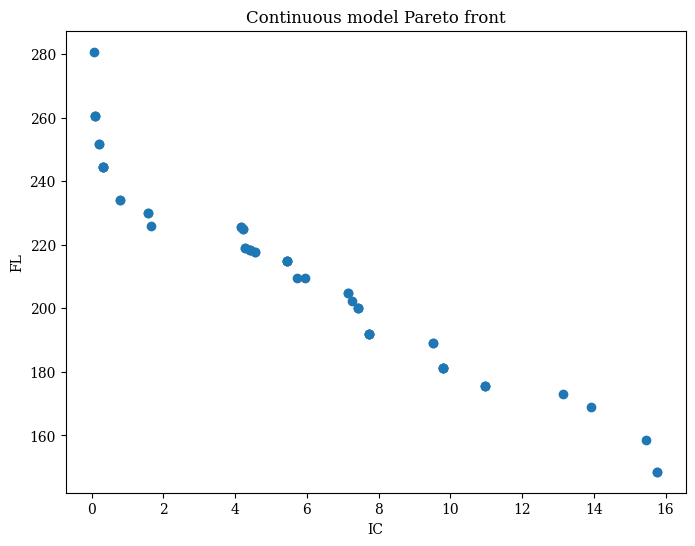

In [5]:
F = res.opt.get("F")
plot = Scatter(
    title="Continuous model Pareto front",
    labels=['IC', 'FL']
)
plot.add(F)
plot.show()